In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
api_key='...'
channel_ids=['UC4B9WdU2U6E6GQoDBKcVeSQ',
             'UCT9y7nOBdqfWuaZJ_x9mPkA',
             'UChUJbP5pivwW9wuJecKAADg',
             'UC1OqFNGQe7k6iJuBuPGUyhg',
             'UCUJUh45jKi5jqiY7b1lDH2g']

youtube=build('youtube','v3',developerKey=api_key)

In [3]:
#for channel statistics
def get_channel_stats(youtube,channel_ids):
  all_data=[]
  request=youtube.channels().list(
      part='snippet,contentDetails,statistics',
      id=','.join(channel_ids))
  response=request.execute()

  for i in range(len(response['items'])):
    data=dict(Channel_name=response['items'][i]['snippet']['title'],
            Subscribers=response['items'][i]['statistics']['subscriberCount'],
            Views=response['items'][i]['statistics']['videoCount'],
              Total_videos=response['items'][i]['statistics']['videoCount'],
              playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
    all_data.append(data)

  #return response

  #return data

  return all_data

In [4]:
channel_statistics=get_channel_stats(youtube,channel_ids)
get_channel_stats(youtube,channel_ids)

[{'Channel_name': 'Manasi Mau',
  'Subscribers': '446000',
  'Views': '726',
  'Total_videos': '726',
  'playlist_id': 'UU1OqFNGQe7k6iJuBuPGUyhg'},
 {'Channel_name': 'Hannah Elise',
  'Subscribers': '806000',
  'Views': '323',
  'Total_videos': '323',
  'playlist_id': 'UUT9y7nOBdqfWuaZJ_x9mPkA'},
 {'Channel_name': 'Mridul Sharma',
  'Subscribers': '756000',
  'Views': '1212',
  'Total_videos': '1212',
  'playlist_id': 'UU4B9WdU2U6E6GQoDBKcVeSQ'},
 {'Channel_name': 'Maureen Moreira',
  'Subscribers': '4',
  'Views': '3',
  'Total_videos': '3',
  'playlist_id': 'UUUJUh45jKi5jqiY7b1lDH2g'},
 {'Channel_name': 'Alanna & Ivor',
  'Subscribers': '1200000',
  'Views': '307',
  'Total_videos': '307',
  'playlist_id': 'UUhUJbP5pivwW9wuJecKAADg'}]

In [5]:
channel_data=pd.DataFrame(channel_statistics)

In [6]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Mridul Sharma,756000,1212,1212,UU4B9WdU2U6E6GQoDBKcVeSQ
1,Alanna & Ivor,1200000,307,307,UUhUJbP5pivwW9wuJecKAADg
2,Manasi Mau,446000,726,726,UU1OqFNGQe7k6iJuBuPGUyhg
3,Maureen Moreira,4,3,3,UUUJUh45jKi5jqiY7b1lDH2g
4,Hannah Elise,806000,323,323,UUT9y7nOBdqfWuaZJ_x9mPkA


In [7]:
channel_data['Subscribers']=pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']=pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

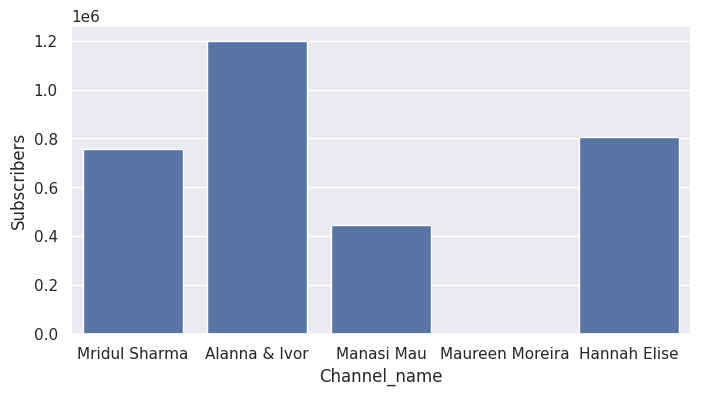

In [8]:
sns.set(rc={'figure.figsize':(8,4)})
ax=sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

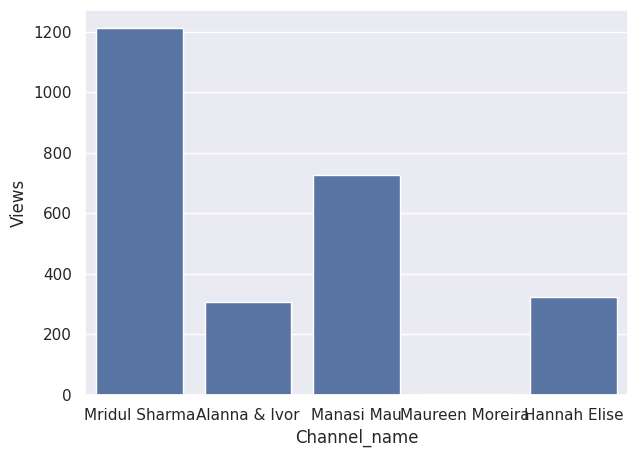

In [9]:
sns.set(rc={'figure.figsize':(7,5)})
ax=sns.barplot(x='Channel_name',y='Views',data=channel_data)

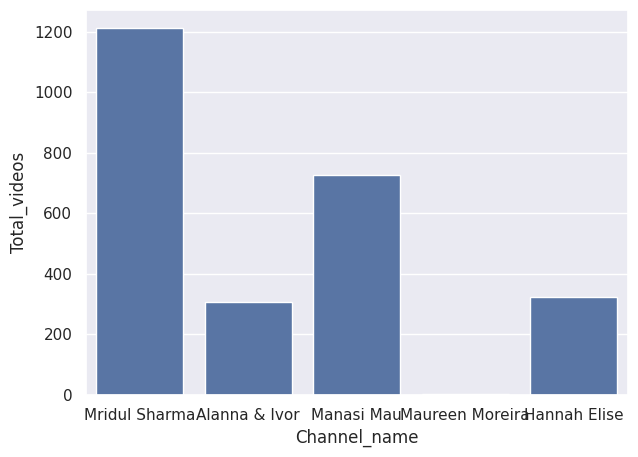

In [10]:
sns.set(rc={'figure.figsize':(7,5)})
ax=sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

In [11]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Mridul Sharma,756000,1212,1212,UU4B9WdU2U6E6GQoDBKcVeSQ
1,Alanna & Ivor,1200000,307,307,UUhUJbP5pivwW9wuJecKAADg
2,Manasi Mau,446000,726,726,UU1OqFNGQe7k6iJuBuPGUyhg
3,Maureen Moreira,4,3,3,UUUJUh45jKi5jqiY7b1lDH2g
4,Hannah Elise,806000,323,323,UUT9y7nOBdqfWuaZJ_x9mPkA


In [12]:
playlist_id=channel_data.loc[channel_data['Channel_name']=='Alanna & Ivor','playlist_id'].iloc[0]

In [13]:
playlist_id

'UUhUJbP5pivwW9wuJecKAADg'

In [26]:
#function to get video ids
def get_video_ids(youtube,playlist_id):
  request=youtube.playlistItems().list(
      part='contentDetails',
      playlistId=playlist_id,
      maxResults=50)
  response=request.execute()

  video_ids=[]
  for i in range(len(response['items'])):
    video_ids.append(response['items'][i]['contentDetails']['videoId'])

  next_page_token=response.get('nextPageToken')
  more_pages=True

  while more_pages:
    if next_page_token is None:
      more_pages=False
    else:
      request=youtube.playlistItems().list(
          part='contentDetails',
          playlistId=playlist_id,
          maxResults=50,
          pageToken=next_page_token)
      response=request.execute()

      for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

      next_page_token=response.get('nextPageToken')


  #return response

  #return len(video_ids)

  return video_ids

In [27]:
video_ids=get_video_ids(youtube,playlist_id)
video_ids

['xcW6kKyx2K0',
 'vd7W_YLdtSU',
 'bPGeKi4bVWk',
 'b0MXk27xbP8',
 '0-mOxKTsPF8',
 '4qRvQZBn4Yo',
 'mUue8rVjRR0',
 'VmPFTOdfmgE',
 'Ndfccg-M8E4',
 'vwbfYb5q5Kk',
 'SBoUEAhzuc4',
 'kks69N9Tx1I',
 'ICe5PozQqiw',
 'UdkBVyEy86I',
 'trlYS74scyE',
 '2yspw5935Og',
 'zQj-FocInrw',
 'Dj6_ZIJ320U',
 'gaba998AA4g',
 'v-GhvrygCj0',
 '2Grk2IBC4ho',
 'mnfijT-QDPI',
 'twCX2kjGd48',
 '2KqGc6jPDBM',
 'Mk7Lz7ow8s8',
 'pmhekjM4T_E',
 '7ON3a5OzP80',
 'HHtJoh7AOMQ',
 'lAMn6eVzge0',
 'nOKBEDHIEnM',
 'szcBumt1FXY',
 '_4-jwWbuefg',
 'vf-HtcES4Vs',
 '3gKbrZ3Qpek',
 'Lfw123IQHpA',
 '8xjYPE6suxw',
 'tCUQ8scziwM',
 'NRK7ISFtgI4',
 '-COUMG2P2Ps',
 'zlrqI525tZI',
 '6DcX9OA64pk',
 'cs8P4CKTxL0',
 'DfP3oyYzh7Y',
 'acnBkk3g274',
 'kXX9ZCVnYQg',
 'L-ZoDu68vYk',
 '4qcdo_Yd7Hc',
 'Qg9o0WFKWRA',
 'GBUnpMrYyu8',
 'rtxVmEXZQ4o',
 'Qrvky47zimA',
 'KxCXJU_4Oio',
 '3kLWFcG2e4s',
 'casl322vzCc',
 'hno0-tqnnFA',
 'dxr_CRA3Jwc',
 'I2kcTCVfsc4',
 'urvXSOKZo0k',
 'wfaqEvmKORg',
 'IrarCyfiR3U',
 'kBariyrXosQ',
 'Q9pCZqigv4Y',
 'vqUvBU

In [28]:
#to get video details
def get_video_details(youtube,video_ids):
  all_video_stats=[]

  for i in range(0,len(video_ids),50):
    request=youtube.videos().list(
        part='snippet,statistics',
        id=','.join(video_ids[i:i+50]))
    response=request.execute()

    for video in response['items']:
      video_stats=dict(Title=video['snippet']['title'],
                       Published_date=video['snippet']['publishedAt'],
                       Views=video['statistics']['viewCount'],
                       Likes=video['statistics']['likeCount'],
                       Comments=video['statistics']['commentCount'])
      all_video_stats.append(video_stats)

  #return response

  return all_video_stats

In [30]:
video_details=get_video_details(youtube,video_ids)
get_video_details(youtube,video_ids)

[{'Title': 'Why is your baby bump so big?',
  'Published_date': '2024-04-03T07:31:35Z',
  'Views': '670941',
  'Likes': '31956',
  'Comments': '53'},
 {'Title': 'Morning walks around Milan',
  'Published_date': '2024-04-02T05:59:30Z',
  'Views': '456563',
  'Likes': '18938',
  'Comments': '71'},
 {'Title': '“Balika Vadhu fans will be loving this look” 💀',
  'Published_date': '2024-04-01T11:34:20Z',
  'Views': '867451',
  'Likes': '35477',
  'Comments': '73'},
 {'Title': 'GRWM for a YSL beauty event in Paris 🖤🇫🇷',
  'Published_date': '2024-03-31T09:24:35Z',
  'Views': '478264',
  'Likes': '19909',
  'Comments': '61'},
 {'Title': 'FAMILY sees me PREGNANT for the FIRST time!',
  'Published_date': '2024-03-31T05:23:25Z',
  'Views': '1856268',
  'Likes': '39645',
  'Comments': '632'},
 {'Title': 'Bonjour Paris 🇫🇷',
  'Published_date': '2024-03-30T16:00:16Z',
  'Views': '224874',
  'Likes': '11565',
  'Comments': '45'},
 {'Title': 'Our Gender Reveal',
  'Published_date': '2024-03-22T12:11:03

In [31]:
video_data=pd.DataFrame(video_details)
video_data

,Title,Published_date,Views,Likes,Comments
0,Why is your baby bump so big?,2024-04-03T07:31:35Z,670941,31956,53
1,Morning walks around Milan,2024-04-02T05:59:30Z,456563,18938,71
2,“Balika Vadhu fans will be loving this look” 💀,2024-04-01T11:34:20Z,867451,35477,73
3,GRWM for a YSL beauty event in Paris 🖤🇫🇷,2024-03-31T09:24:35Z,478264,19909,61
4,FAMILY sees me PREGNANT for the FIRST time!,2024-03-31T05:23:25Z,1856268,39645,632
...,...,...,...,...,...
302,1 year ANNIVERSARY SURPRISE || Couldn’t stop c...,2020-11-06T04:00:28Z,330379,10422,175
303,We tried to COOK INDIAN FOOD,2020-10-30T04:00:10Z,301094,6526,157
304,Annoying PRANKS on my BOYFRIEND,2020-10-18T04:57:38Z,158225,4539,64
305,NEVER HAVE I EVER || Collabtribe,2020-10-15T05:00:10Z,343622,7559,244


In [33]:
video_data['Published_date']=pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views']=pd.to_numeric(video_data['Views'])
video_data['Likes']=pd.to_numeric(video_data['Likes'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Why is your baby bump so big?,2024-04-03,670941,31956,53
1,Morning walks around Milan,2024-04-02,456563,18938,71
2,“Balika Vadhu fans will be loving this look” 💀,2024-04-01,867451,35477,73
3,GRWM for a YSL beauty event in Paris 🖤🇫🇷,2024-03-31,478264,19909,61
4,FAMILY sees me PREGNANT for the FIRST time!,2024-03-31,1856268,39645,632
...,...,...,...,...,...
302,1 year ANNIVERSARY SURPRISE || Couldn’t stop c...,2020-11-06,330379,10422,175
303,We tried to COOK INDIAN FOOD,2020-10-30,301094,6526,157
304,Annoying PRANKS on my BOYFRIEND,2020-10-18,158225,4539,64
305,NEVER HAVE I EVER || Collabtribe,2020-10-15,343622,7559,244


In [35]:
top10_videos=video_data.sort_values(by='Views',ascending=False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Comments
144,My brother & sister killed it 🕺🏻💃🏻,2023-07-07,86647992,2574105,5940
113,Not even the birds are allowed to peek,2023-08-26,83165014,848656,1925
165,My husband is more Indian than I’ll ever be 🥲,2023-05-06,50230060,1433720,8084
142,The best surprise a Bride could ask for ❤️,2023-07-09,43929221,2039671,2564
126,Our family performs “how we met” on wedding night,2023-07-24,26142121,760342,1464
94,He’ll never trust me again,2023-10-02,25313016,1312614,3202
191,Surprise Dance performances for the BRIDE! - W...,2023-03-18,23733961,291748,5918
66,Brothers,2023-11-19,17933775,546250,1210
98,He left and still hasn’t come back,2023-09-20,14295971,483323,2117
157,My mom always told me to find someone who woul...,2023-06-01,14026573,154966,374


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128378 (\N{MAN DANCING}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128131 (\N{DANCER}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129394 (\N{SMILING FACE WITH TEAR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128378 (\N{MAN DANCING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2

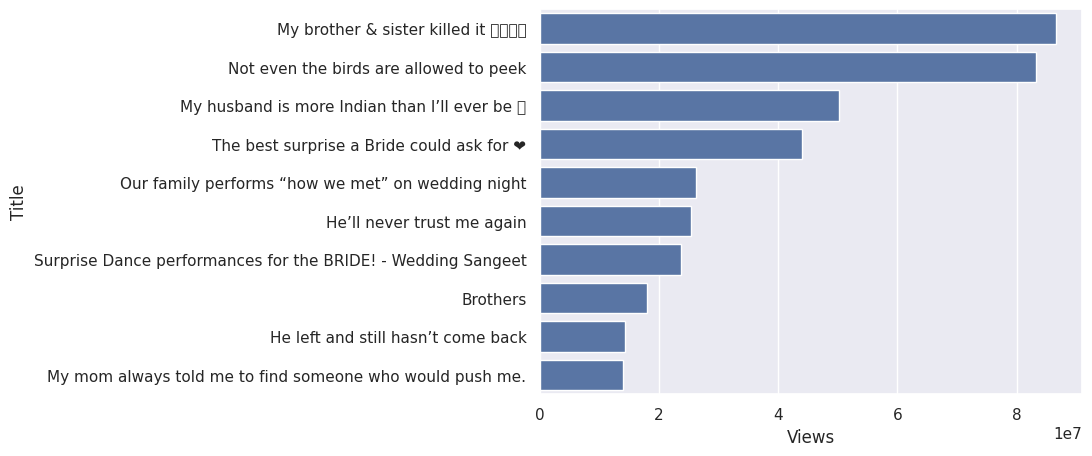

In [36]:
ax1=sns.barplot(x='Views',y='Title',data=top10_videos)

In [37]:
video_data

,Title,Published_date,Views,Likes,Comments
0,Why is your baby bump so big?,2024-04-03,670941,31956,53
1,Morning walks around Milan,2024-04-02,456563,18938,71
2,“Balika Vadhu fans will be loving this look” 💀,2024-04-01,867451,35477,73
3,GRWM for a YSL beauty event in Paris 🖤🇫🇷,2024-03-31,478264,19909,61
4,FAMILY sees me PREGNANT for the FIRST time!,2024-03-31,1856268,39645,632
...,...,...,...,...,...
302,1 year ANNIVERSARY SURPRISE || Couldn’t stop c...,2020-11-06,330379,10422,175
303,We tried to COOK INDIAN FOOD,2020-10-30,301094,6526,157
304,Annoying PRANKS on my BOYFRIEND,2020-10-18,158225,4539,64
305,NEVER HAVE I EVER || Collabtribe,2020-10-15,343622,7559,244


In [41]:
video_data['Month']=pd.to_datetime(video_data['Published_date']).dt.strftime('%b')
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,Why is your baby bump so big?,2024-04-03,670941,31956,53,Apr
1,Morning walks around Milan,2024-04-02,456563,18938,71,Apr
2,“Balika Vadhu fans will be loving this look” 💀,2024-04-01,867451,35477,73,Apr
3,GRWM for a YSL beauty event in Paris 🖤🇫🇷,2024-03-31,478264,19909,61,Mar
4,FAMILY sees me PREGNANT for the FIRST time!,2024-03-31,1856268,39645,632,Mar
...,...,...,...,...,...,...
302,1 year ANNIVERSARY SURPRISE || Couldn’t stop c...,2020-11-06,330379,10422,175,Nov
303,We tried to COOK INDIAN FOOD,2020-10-30,301094,6526,157,Oct
304,Annoying PRANKS on my BOYFRIEND,2020-10-18,158225,4539,64,Oct
305,NEVER HAVE I EVER || Collabtribe,2020-10-15,343622,7559,244,Oct


In [45]:
videos_per_month=video_data.groupby('Month',as_index=False).size()
videos_per_month

,Month,size
0,Apr,21
1,Aug,22
2,Dec,27
3,Feb,19
4,Jan,25
5,Jul,33
6,Jun,15
7,Mar,52
8,May,14
9,Nov,32


In [52]:
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
videos_per_month.index=pd.CategoricalIndex(videos_per_month['Month'],categories=sort_order,ordered=True)
videos_per_month.sort_index()

,Month,size
Month,,
Jan,Jan,25
Feb,Feb,19
Mar,Mar,52
Apr,Apr,21
May,May,14
Jun,Jun,15
Jul,Jul,33
Aug,Aug,22
Oct,Oct,25


In [53]:
videos_per_month=videos_per_month.sort_index()

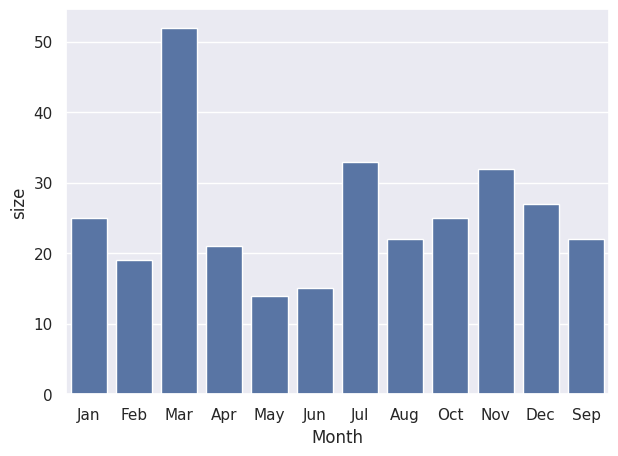

In [54]:
ax2=sns.barplot(x='Month',y='size',data=videos_per_month)

In [56]:
video_data.to_csv('Video_Deatils(MridulSharma).csv')